In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt

2025-06-26 15:02:11.688296: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750950131.889533      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750950131.943693      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
!pip install split-folders

In [3]:
import splitfolders
splitfolders.ratio("/kaggle/input/faces-dataset/data", output="main",seed=1337, ratio=(.7, .2, .1))

Copying files: 5194 files [00:27, 188.12 files/s]


In [4]:
train = keras.utils.image_dataset_from_directory(
    "/kaggle/working/main/train",
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    verbose=True,
)
val = keras.utils.image_dataset_from_directory(
    "/kaggle/working/main/val",
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    verbose=True,
)
test = keras.utils.image_dataset_from_directory(
    "/kaggle/working/main/test",
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    verbose=True,
)

Found 3635 files belonging to 5 classes.


I0000 00:00:1750950220.034813      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Found 1038 files belonging to 5 classes.
Found 521 files belonging to 5 classes.


## vgg16_scratch

In [5]:
checkpoint  = tensorflow.keras.callbacks.ModelCheckpoint(
    "/kaggle/working/vgg16_scratch.keras",
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    mode='min',
    save_freq='epoch',
    verbose = 1,
)

early_stop = tensorflow.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

requirements = [checkpoint, early_stop]


In [6]:
vgg16_scratch = keras.applications.VGG16(include_top=False,weights=None,input_shape=(224,224,3))

model1 = keras.Sequential([
    vgg16_scratch,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(4096,activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(4096,activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(17,activation="softmax")
])
model1.summary()

model1.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
history_model1 = model1.fit(train,epochs=50,batch_size=512,validation_data=[val], callbacks = requirements)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │       2,101,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 4096)                │          16,384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 4096)                │          16,384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 17)                  │          69,649 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,699,665 (128.55 MB)

 Trainable params: 33,683,281 (128.49 MB)

 Non-trainable params: 16,384 (64.00 KB)

Epoch 1/50


I0000 00:00:1750950258.597690     111 service.cc:148] XLA service 0x2be7f6a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750950258.599231     111 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1750950259.397968     111 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1750950279.980716     111 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.4169 - loss: 2.7014
Epoch 1: val_loss improved from inf to 180736.73438, saving model to /kaggle/working/vgg16_scratch.keras
114/114 ━━━━━━━━━━━━━━━━━━━━ 83s 480ms/step - accuracy: 0.4178 - loss: 2.6946 - val_accuracy: 0.1493 - val_loss: 180736.7344
Epoch 2/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.6638 - loss: 1.1933
Epoch 2: val_loss improved from 180736.73438 to 12.70213, saving model to /kaggle/working/vgg16_scratch.keras
114/114 ━━━━━━━━━━━━━━━━━━━━ 30s 260ms/step - accuracy: 0.6640 - loss: 1.1928 - val_accuracy: 0.0202 - val_loss: 12.7021
Epoch 3/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.7095 - loss: 1.0672
Epoch 3: val_loss did not improve from 12.70213
114/114 ━━━━━━━━━━━━━━━━━━━━ 27s 241ms/step - accuracy: 0.7096 - loss: 1.0668 - val_accuracy: 0.2312 - val_loss: 2178443.7500
Epoch 4/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.7316 - loss: 1.0457
Epoch 4: val_loss improv

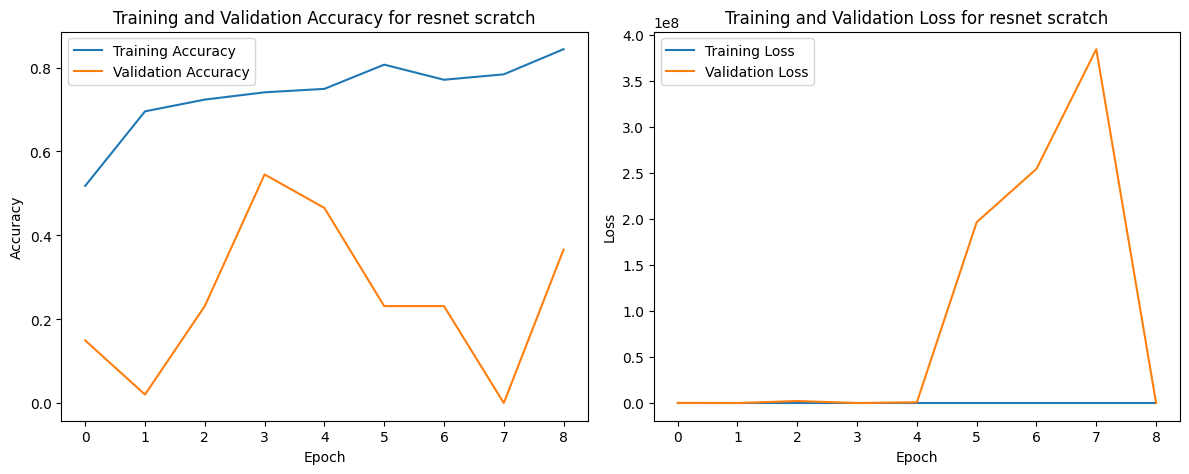

In [7]:
# Plotting the graphs side by side
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_model1.history['accuracy'], label='Training Accuracy')
plt.plot(history_model1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy for resnet scratch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_model1.history['loss'], label='Training Loss')
plt.plot(history_model1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for resnet scratch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig(r"/kaggle/working/vgg16_scratch.jpg")
plt.show()

## vgg16_transf1

In [8]:

checkpoint  = tensorflow.keras.callbacks.ModelCheckpoint(
    "/kaggle/working/vgg16_transf1.keras",
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    mode='min',
    save_freq='epoch',
    verbose = 1,
)

early_stop = tensorflow.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

requirements1 = [checkpoint, early_stop]


In [9]:

vgg16_transf1 = keras.applications.VGG16(include_top=False,weights="imagenet")
for layer in vgg16_transf1.layers:
    layer.trainable = False

model2 = keras.Sequential([
    vgg16_transf1,
    keras.layers.GlobalAveragePooling2D(), 
    keras.layers.Dense(1024,activation="relu"),
    keras.layers.Dense(1024,activation="relu"),
    keras.layers.Dense(17,activation="softmax")
])
model2.summary()
model2.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
history_model2 = model2.fit(train,epochs=50,batch_size=512,validation_data=[val], callbacks = requirements1)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, None, None, 512)     │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 17)                  │          17,425 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,307,025 (62.21 MB)

 Trainable params: 1,592,337 (6.07 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.8104 - loss: 0.7623
Epoch 1: val_loss improved from inf to 0.00241, saving model to /kaggle/working/vgg16_transf1.keras
114/114 ━━━━━━━━━━━━━━━━━━━━ 20s 148ms/step - accuracy: 0.8115 - loss: 0.7577 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 2/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9992 - loss: 0.0026
Epoch 2: val_loss improved from 0.00241 to 0.00090, saving model to /kaggle/working/vgg16_transf1.keras
114/114 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - accuracy: 0.9992 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 9.0143e-04
Epoch 3/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 1.0000 - loss: 1.6077e-04
Epoch 3: val_loss improved from 0.00090 to 0.00067, saving model to /kaggle/working/vgg16_transf1.keras
114/114 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - accuracy: 1.0000 - loss: 1.6052e-04 - val_accuracy: 1.0000 - val_loss: 6.7256e-04
Epoch 4/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - a

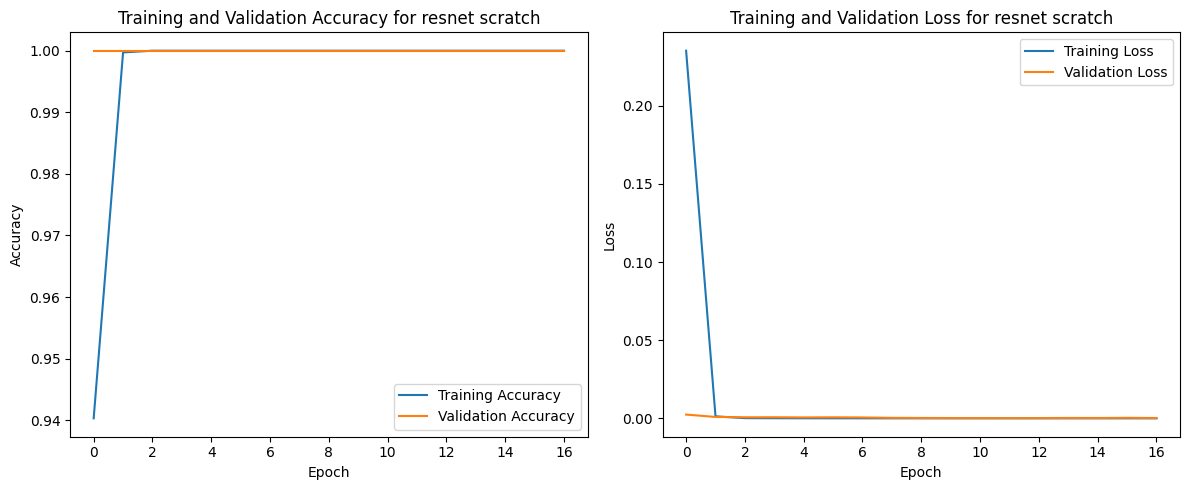

In [10]:
# Plotting the graphs side by side
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_model2.history['accuracy'], label='Training Accuracy')
plt.plot(history_model2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy for resnet scratch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_model2.history['loss'], label='Training Loss')
plt.plot(history_model2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for resnet scratch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig(r"/kaggle/working/vgg16_transf1.jpg")
plt.show()

## vgg16_transf2

In [11]:

checkpoint  = tensorflow.keras.callbacks.ModelCheckpoint(
    "/kaggle/working/vgg16_transf2.keras",
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    mode='min',
    save_freq='epoch',
    verbose = 1,
)

early_stop = tensorflow.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

requirements2 = [checkpoint, early_stop]


In [12]:
vgg16_transf2 = keras.applications.VGG16(include_top=False,weights="imagenet")

for layer in vgg16_transf2.layers:
    if layer.name == 'conv2_block1_2_conv' or  layer.name == 'conv5_block1_1_relu' or layer.name ==  'conv5_block3_3_conv' or layer.name == "block5_conv2" or layer.name == "conv4_block5_1_relu":
      layer.trainable = False

model3 = keras.Sequential([
    vgg16_transf2,
    keras.layers.GlobalAveragePooling2D(), # GlobalAveragePoolingLayer
    keras.layers.Dense(1000,activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),

    keras.layers.Dense(1000,activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(17,activation="softmax")
])
model3.summary()
model3.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
history_model3 = model3.fit(train,epochs=50,batch_size=512,validation_data=val,callbacks=requirements2)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, None, None, 512)     │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1000)                │         513,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1000)                │       1,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 17)                  │          17,017 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,245,705 (61.97 MB)

 Trainable params: 13,885,897 (52.97 MB)

 Non-trainable params: 2,359,808 (9.00 MB)

Epoch 1/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.3617 - loss: 5.7256
Epoch 1: val_loss improved from inf to 1.56258, saving model to /kaggle/working/vgg16_transf2.keras
114/114 ━━━━━━━━━━━━━━━━━━━━ 40s 282ms/step - accuracy: 0.3633 - loss: 5.7032 - val_accuracy: 0.9133 - val_loss: 1.5626
Epoch 2/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.9207 - loss: 1.3798
Epoch 2: val_loss improved from 1.56258 to 1.25783, saving model to /kaggle/working/vgg16_transf2.keras
114/114 ━━━━━━━━━━━━━━━━━━━━ 28s 242ms/step - accuracy: 0.9206 - loss: 1.3791 - val_accuracy: 0.9008 - val_loss: 1.2578
Epoch 3/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.8749 - loss: 1.2639
Epoch 3: val_loss improved from 1.25783 to 0.91927, saving model to /kaggle/working/vgg16_transf2.keras
114/114 ━━━━━━━━━━━━━━━━━━━━ 28s 242ms/step - accuracy: 0.8750 - loss: 1.2632 - val_accuracy: 0.9383 - val_loss: 0.9193
Epoch 4/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.

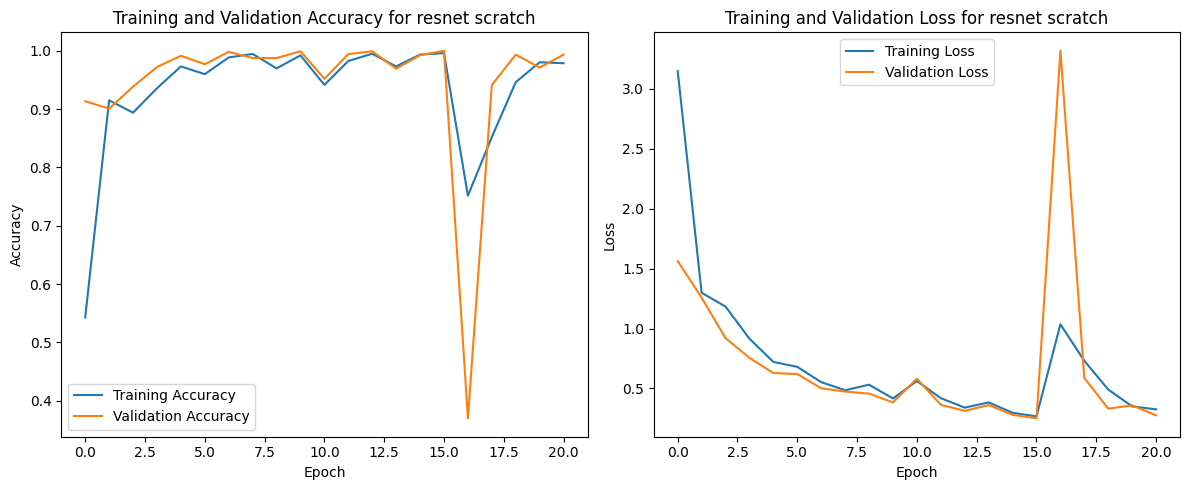

In [13]:
# Plotting the graphs side by side
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_model3.history['accuracy'], label='Training Accuracy')
plt.plot(history_model3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy for resnet scratch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_model3.history['loss'], label='Training Loss')
plt.plot(history_model3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for resnet scratch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig(r"/kaggle/working/vgg16_transf2.jpg")
plt.show()